# Natural Language Processing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [2]:
inpDir = os.path.join('..', '..', 'input')
moduleDir = 'machine_learning'
outDir = os.path.join('..', 'output')
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 9),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('bmh')

EPOCHS = 20000
ALPHA = 0.1
NUM_SAMPLES = 1280 
NOISE = 0.2 
TEST_SIZE = 0.2

<Figure size 1500x900 with 0 Axes>

In [3]:
!ls -l input

total 146136
-rw-rw-r-- 1 hpcap hpcap  3974305 May 20  2020 adult.data
-rw-rw-r-- 1 hpcap hpcap   688092 May 20  2020 citibike.csv
-rw-rw-r-- 1 hpcap hpcap    59011 Feb  8  2016 concrete_data.csv
-rw-rw-r-- 1 hpcap hpcap   267084 Jan 25  2016 digits.csv
-rw-rw-r-- 1 hpcap hpcap    44417 Jan 30  2016 dt_sample.csv
-rw-rw-r-- 1 hpcap hpcap  9140113 Oct 11  2019 fifa_2019.csv
-rw-rw-r-- 1 hpcap hpcap    41083 Jan 27  2016 housing_data.csv
-rw-rw-r-- 1 hpcap hpcap     2736 Jan 19 02:46 iris.csv
-rw-rw-r-- 1 hpcap hpcap    43884 Feb 12  2016 knn_3b_sample.csv
-rw-rw-r-- 1 hpcap hpcap     2158 Jan 23  2016 movie_rating.csv
-rw-rw-r-- 1 hpcap hpcap     5822 May 20  2020 ram_price.csv
-rw-r--r-- 1 hpcap hpcap   626900 Feb 24  2016 sample_submission.csv
-rw-rw-r-- 1 hpcap hpcap   179883 Apr 25  2016 sample_submission.csv.zip
-rw-r--r-- 1 hpcap hpcap 59054007 Feb 24  2016 test.csv
-rw-rw-r-- 1 hpcap hpcap  3471444 Apr 25  2016 test.csv.zip
-rw-rw-r-- 1 hpcap hpcap    85155 Feb  1  2016 titanic.c

In [4]:
x, y = datasets.make_moons(n_samples=1000, noise=0.2, random_state=RANDOM_STATE)

In [5]:
data_df = pd.DataFrame(x, columns=['x1', 'x2'])
data_df['target'] = y
data_df.head()

,x1,x2,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<AxesSubplot: xlabel='x1', ylabel='x2'>

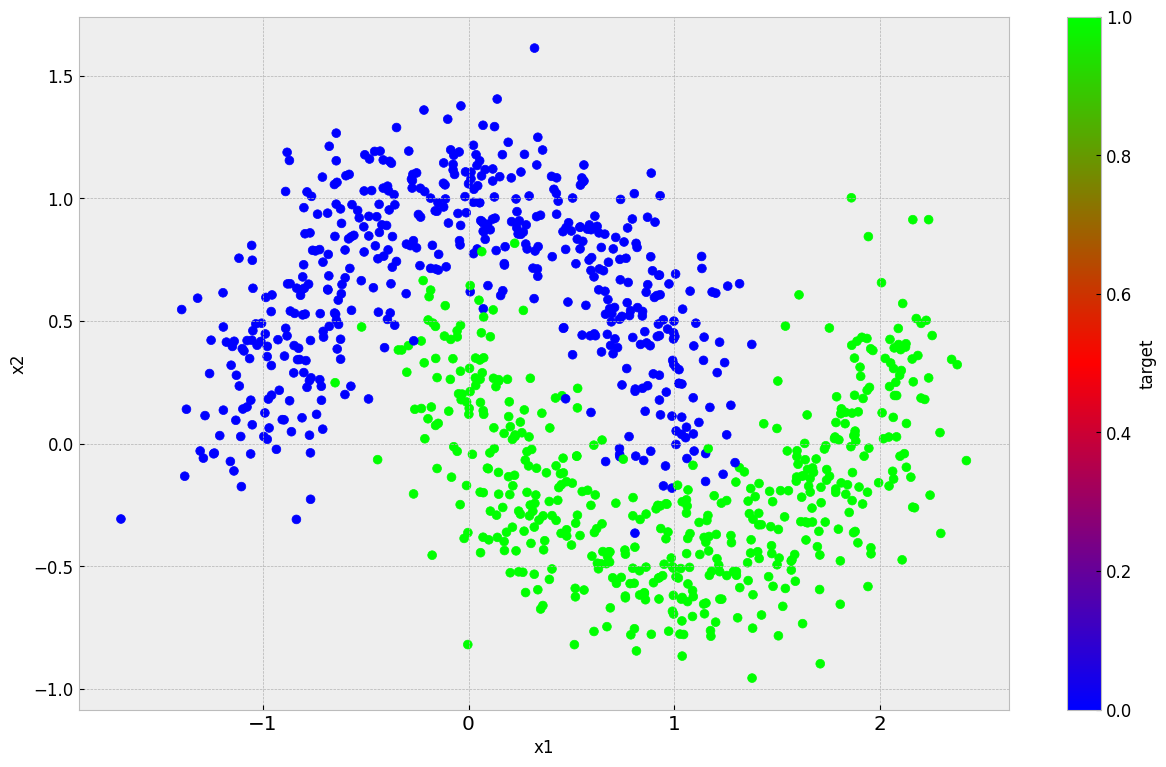

In [6]:
data_df.plot.scatter("x1","x2", s=40, c="target", cmap=CMAP)

In [7]:
#splite data
data_train, data_test = data_df[:900], data_df[900:]
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [8]:
data_train.head()

,x1,x2,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [9]:
data_test.head()

,x1,x2,target
900,1.647361,-0.104937,1
901,-0.557157,0.848979,0
902,1.158265,-0.313161,1
903,-0.641910,0.502393,0
904,0.680606,-0.440832,1


In [10]:
def predict(row, weights):
    '''
    Args: 
        row: one data row.
        weights: array with first value as b and then w1 and w2.
    return:
        0 if sum is negative else 1. Simplest form of activation function.
    '''
    
    # building up z = X * W + b
    z = weights[0]
    
    for i in range(len(row)-1):        
        z += weights[i + 1] * row[i]

    return 1 if z >=0  else 0 # simplest form of activation function

In [11]:
weights = [0.1, 2.0, 1.0]
predict(data_df.loc[0], weights)

1

In [12]:
def train_weight(train, alpha, n_epoch):
    
    '''
        Args:
            train: np.ndarray - training data
            alpha: float - learning rate
            n_epoch: number of epoch
    '''
    
    errors = []
    
    weights = np.random.rand(train.shape[1])
    
    #print(weights.shape, weights)
    
    m = train.shape[0]
    
    for epoch in range(n_epoch):
        sum_error = 0.
        for row in train:
            prediction = predict(row, weights)
            dz = prediction - row[-1]
            sum_error += (prediction - row[-1])**2
            weights[0] -= alpha * dz/m #updating 'b'
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i] / m
        errors.append(sum_error/m)
        
    return errors, weights

In [13]:
error, weight = train_weight(data_train.to_numpy(), alpha=0.1, n_epoch=2000)

In [14]:
weight

array([-9.38077750e-05,  2.78684546e-04, -4.59729119e-04])

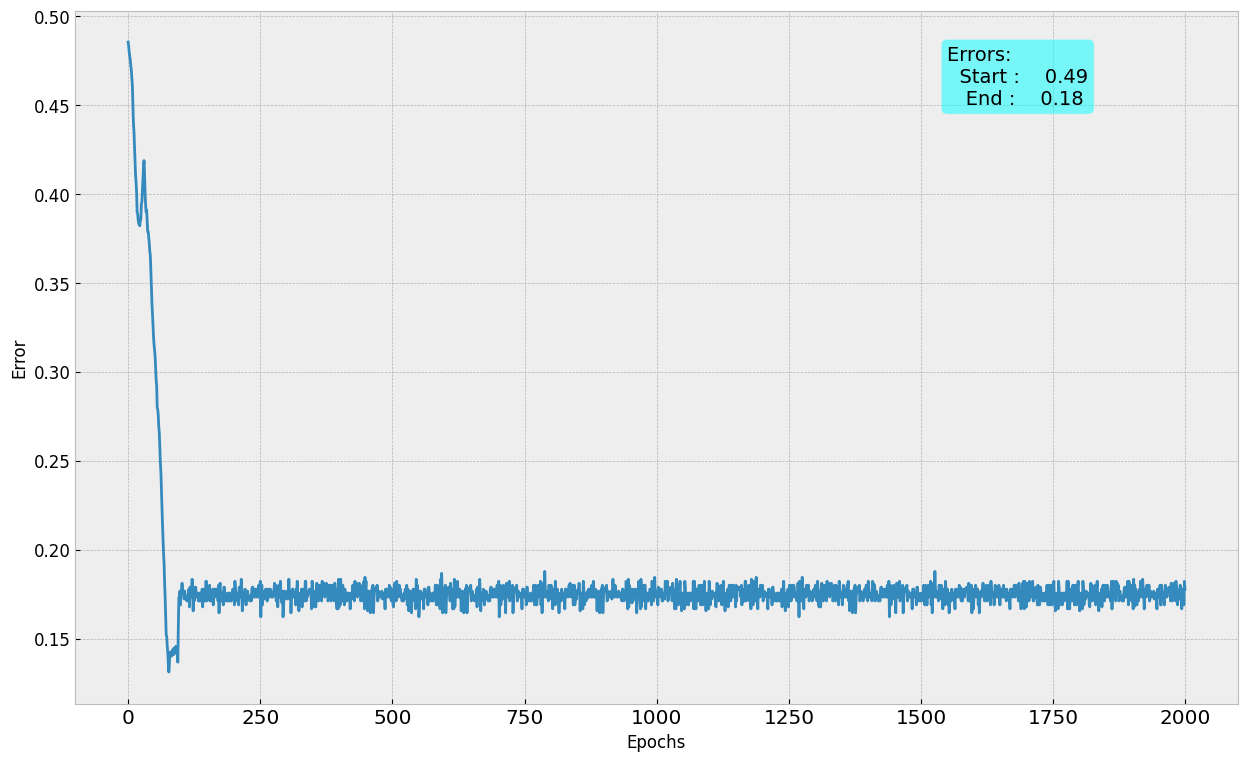

In [15]:
fig, ax = plt.subplots()
ax.plot(error);

# Little beautification
txtstr = "Errors: \n  Start : {:7.2f}\n   End : {:7.2f}".format(error[0],error[-1]) #text to plot

# Properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

# Place a text box in upper left in axes coords

ax.text(0.75, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error");

In [16]:
predictions = []

for row in data_train.to_numpy():    
    prediction = predict(row, weights)    
    predictions.append(prediction)

In [17]:
accuracy_score(data_train['target'], predictions)

0.6388888888888888

In [18]:
predictions = []

for row in data_test.to_numpy():    
    prediction = predict(row, weights)    
    predictions.append(prediction)

In [19]:
accuracy_score(data_test['target'], predictions)

0.64

In [21]:
cm = confusion_matrix(data_test['target'], predictions)
cm

array([[23, 35],
       [ 1, 41]])

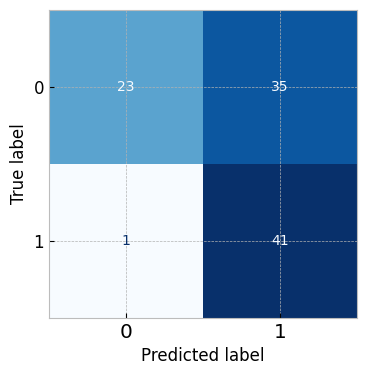

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))
disp.plot(ax = ax, cmap = 'Blues', colorbar=False)
plt.show();

In [23]:
def fn_plot_decision_boundary(X):
    
    fig, ax = plt.subplots();    
    dm = 0.05    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5    
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))    
    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    
    y_pred = []    
    for row in (XX):
        y_p = predict(row, weights)
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=30, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

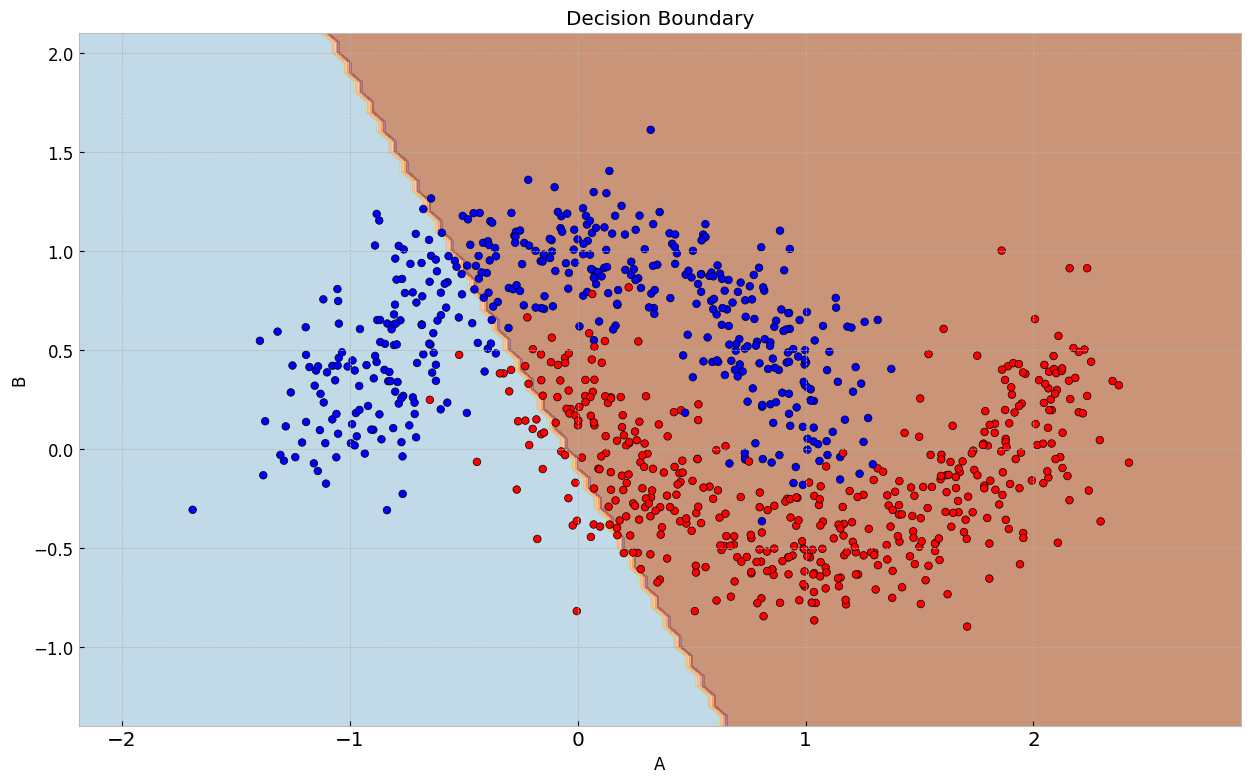

In [27]:
fn_plot_decision_boundary(data_train.to_numpy())